<a href="https://colab.research.google.com/github/Txlu-OG/Learn/blob/main/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Clone repository from GitHub to Colab environment.
!git clone https://github.com/txlu-og/Learn.git

Cloning into 'Learn'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 7 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (7/7), 7.76 KiB | 1.94 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [2]:
# Titanic Dataset Exploratory Data Analysis

# Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Task 1: Load the Titanic dataset
# TODO: Load the Titanic dataset from the following URL
 # url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
# df = ...

local_path = "/content/Titanic-Dataset.csv"
fallback_url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"

if os.path.exists(local_path):
    df = pd.read_csv(local_path)
    print(f"Loaded local file: {local_path}")
else:
    df = pd.read_csv(fallback_url)
    print(f"Local file not found, loaded from URL: {fallback_url}")

print(f"Shape: {df.shape}")

Loaded local file: /content/Titanic-Dataset.csv
Shape: (891, 12)


In [5]:
# Task 2: Inspect the data
# TODO: Display the first 5 rows of the dataset
print("\nHead:")
display(df.head())

# TODO: Display the last 5 rows of the dataset
print("\nTail:")
display(df.tail())

# TODO: Display the data types of each column
print("\nData types:")
print(df.dtypes)

# TODO: Display summary statistics of the numerical columns
print("\nDescribe numeric:")
display(df.describe())

print("\nDescribe object (categorical-like):")
display(df.describe(include='O'))


Head:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Tail:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q



Data types:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Describe numeric:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



Describe object (categorical-like):


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


In [6]:
# Task 3: Clean and preprocess the data

# TODO: Create a new categorical feature 'PclassCategory' from 'Pclass'
# PclassCategory from Pclass
pclass_map = {1: "First", 2: "Second", 3: "Third"}
df["PclassCategory"] = df["Pclass"].map(pclass_map).astype("category")

# TODO: Create a new categorical feature 'CabinCategory' from 'Cabin'
# CabinCategory from Cabin
df["CabinCategory"] = np.where(df["Cabin"].notna(), "HasCabin", "NoCabin")
df["CabinCategory"] = df["CabinCategory"].astype("category")

# TODO: Handle missing values in the 'Age' column (use mean age)
# Handle missing Age with mean
age_mean = df["Age"].mean(skipna=True)
df["Age"] = df["Age"].fillna(age_mean)

# TODO: Create a 'Family' feature by combining 'SibSp' and 'Parch'
# Family feature: SibSp + Parch + 1 (including self)
df["Family"] = df["SibSp"].fillna(0).astype(int) + df["Parch"].fillna(0).astype(int) + 1

print("\nNull counts after Age imputation:")
print(df.isna().sum())


Null counts after Age imputation:
PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin             687
Embarked            2
PclassCategory      0
CabinCategory       0
Family              0
dtype: int64


In [7]:
# Task 4: Identify specific data points

# TODO: Find passengers with the highest fare
max_fare = df["Fare"].max()
highest_fare_passengers = df[df["Fare"] == max_fare][["Name", "Fare", "Pclass", "Sex", "Age", "Family"]]
print("\nPassengers with highest fare:")
display(highest_fare_passengers)

# TODO: Find passengers with the largest family size
# Largest family passengers
max_family = df["Family"].max()
largest_family_passengers = df[df["Family"] == max_family][["Name", "Family", "Pclass", "Sex", "Age", "Fare"]]
print("\nPassengers with largest family size:")
display(largest_family_passengers)


Passengers with highest fare:


,Name,Fare,Pclass,Sex,Age,Family
258,"Ward, Miss. Anna",512.3292,1,female,35.0,1
679,"Cardeza, Mr. Thomas Drake Martinez",512.3292,1,male,36.0,2
737,"Lesurer, Mr. Gustave J",512.3292,1,male,35.0,1



Passengers with largest family size:


,Name,Family,Pclass,Sex,Age,Fare
159,"Sage, Master. Thomas Henry",11,3,male,29.699118,69.55
180,"Sage, Miss. Constance Gladys",11,3,female,29.699118,69.55
201,"Sage, Mr. Frederick",11,3,male,29.699118,69.55
324,"Sage, Mr. George John Jr",11,3,male,29.699118,69.55
792,"Sage, Miss. Stella Anna",11,3,female,29.699118,69.55
846,"Sage, Mr. Douglas Bullen",11,3,male,29.699118,69.55
863,"Sage, Miss. Dorothy Edith ""Dolly""",11,3,female,29.699118,69.55


In [8]:
# Task 5: Demonstrate Pandas Series and DataFrame functionalities

# TODO: Create a Pandas Series of passenger names
# Series of names
names_series = df["Name"]
print("\nNames series sample:")
display(names_series.head())

# TODO: Create a DataFrame of passenger names and ages
# DataFrame of names and ages
names_ages_df = df[["Name", "Age"]].copy()
print("\nNames and ages sample:")
display(names_ages_df.head())

# TODO: Slice the DataFrame to show only passengers older than 50
# Slice older than 50
older_passengers = df.loc[df["Age"] > 50, ["Name", "Age", "Sex", "Pclass"]].sort_values("Age", ascending=False)
print("\nPassengers older than 50:")
display(older_passengers.head(10))

# Indexing examples
print("\n.loc slice example (rows 0 to 5, selected columns):")
display(df.loc[0:5, ["Name", "Age", "Sex", "Pclass"]])

print("\n.iloc slice example (first 5 rows, first 4 columns):")
display(df.iloc[:5, :4])


Names series sample:


,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"



Names and ages sample:


,Name,Age
0,"Braund, Mr. Owen Harris",22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,"Heikkinen, Miss. Laina",26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,"Allen, Mr. William Henry",35.0



Passengers older than 50:


,Name,Age,Sex,Pclass
630,"Barkworth, Mr. Algernon Henry Wilson",80.0,male,1
851,"Svensson, Mr. Johan",74.0,male,3
96,"Goldschmidt, Mr. George B",71.0,male,1
493,"Artagaveytia, Mr. Ramon",71.0,male,1
116,"Connors, Mr. Patrick",70.5,male,3
672,"Mitchell, Mr. Henry Michael",70.0,male,2
745,"Crosby, Capt. Edward Gifford",70.0,male,1
33,"Wheadon, Mr. Edward H",66.0,male,2
456,"Millet, Mr. Francis Davis",65.0,male,1
280,"Duane, Mr. Frank",65.0,male,3



.loc slice example (rows 0 to 5, selected columns):


,Name,Age,Sex,Pclass
0,"Braund, Mr. Owen Harris",22.000000,male,3
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,female,1
2,"Heikkinen, Miss. Laina",26.000000,female,3
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,female,1
4,"Allen, Mr. William Henry",35.000000,male,3
5,"Moran, Mr. James",29.699118,male,3



.iloc slice example (first 5 rows, first 4 columns):


,PassengerId,Survived,Pclass,Name
0,1,0,3,"Braund, Mr. Owen Harris"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,3,1,3,"Heikkinen, Miss. Laina"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,5,0,3,"Allen, Mr. William Henry"


In [9]:
# Task 6: Introduce multi-indexing

# TODO: Create a multi-index DataFrame grouped by 'Sex' and 'Pclass'
multi_index_df = (
    df.groupby(["Sex", "Pclass"])["Survived"]
      .mean()
      .to_frame("SurvivalRate")
      .round(3)
)
print("\nMulti-index survival rates by Sex and Pclass:")
display(multi_index_df)


Multi-index survival rates by Sex and Pclass:


SurvivalRate
Sex    Pclass              
female 1              0.968
       2              0.921
       3              0.500
male   1              0.369
       2              0.157
       3              0.135

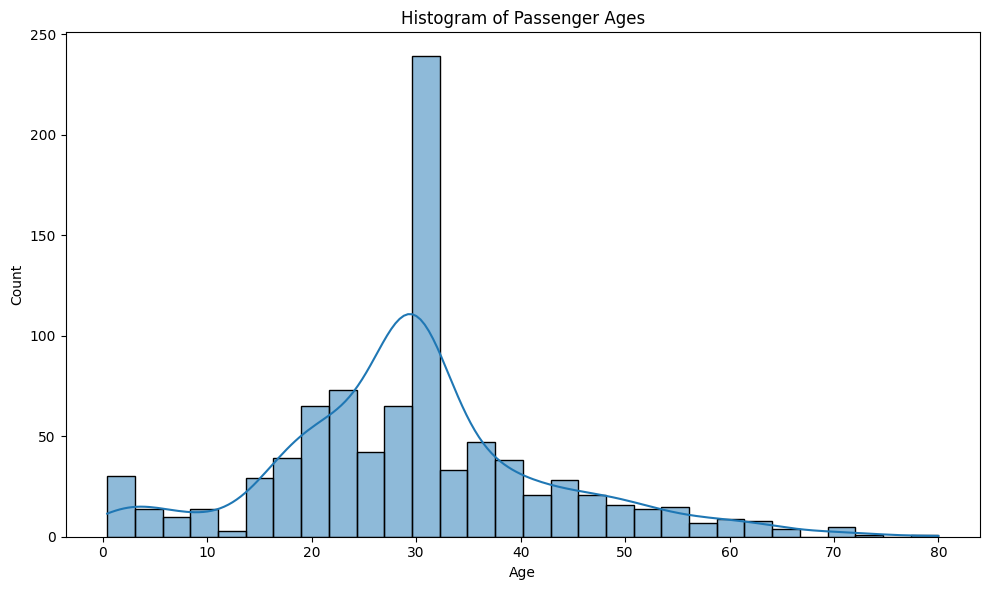

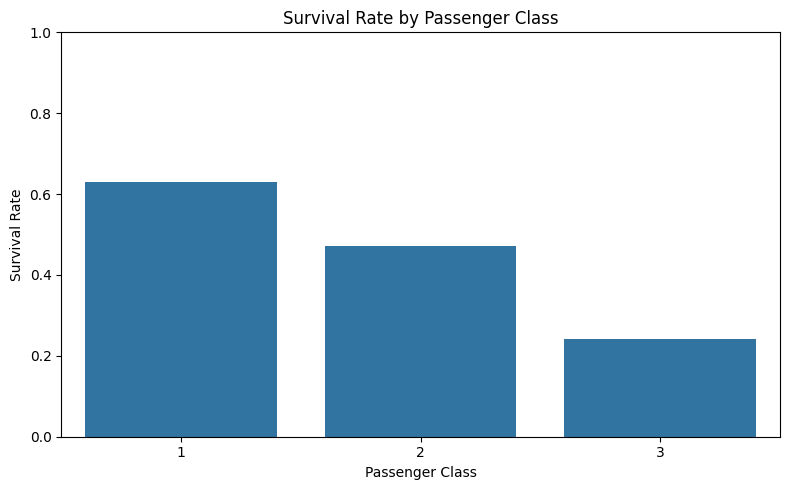

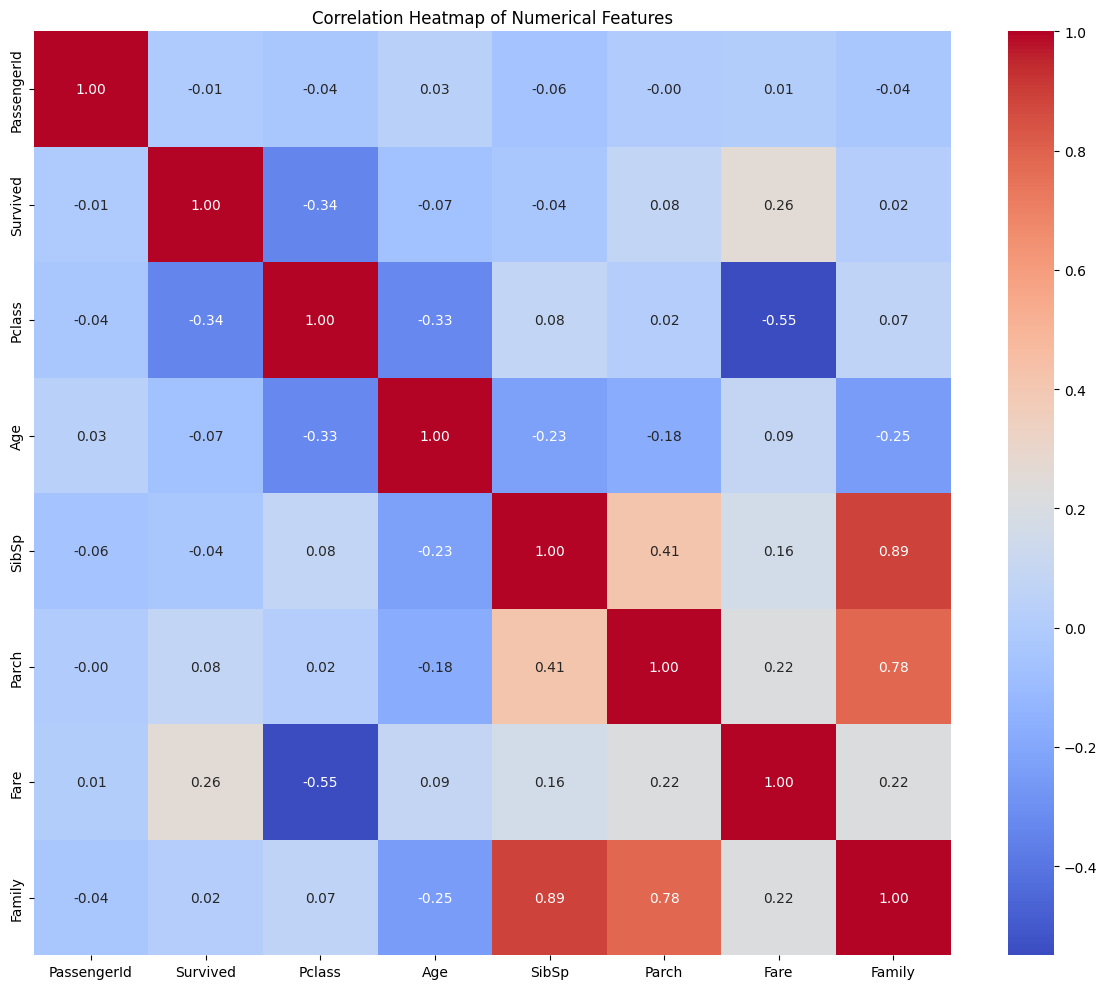

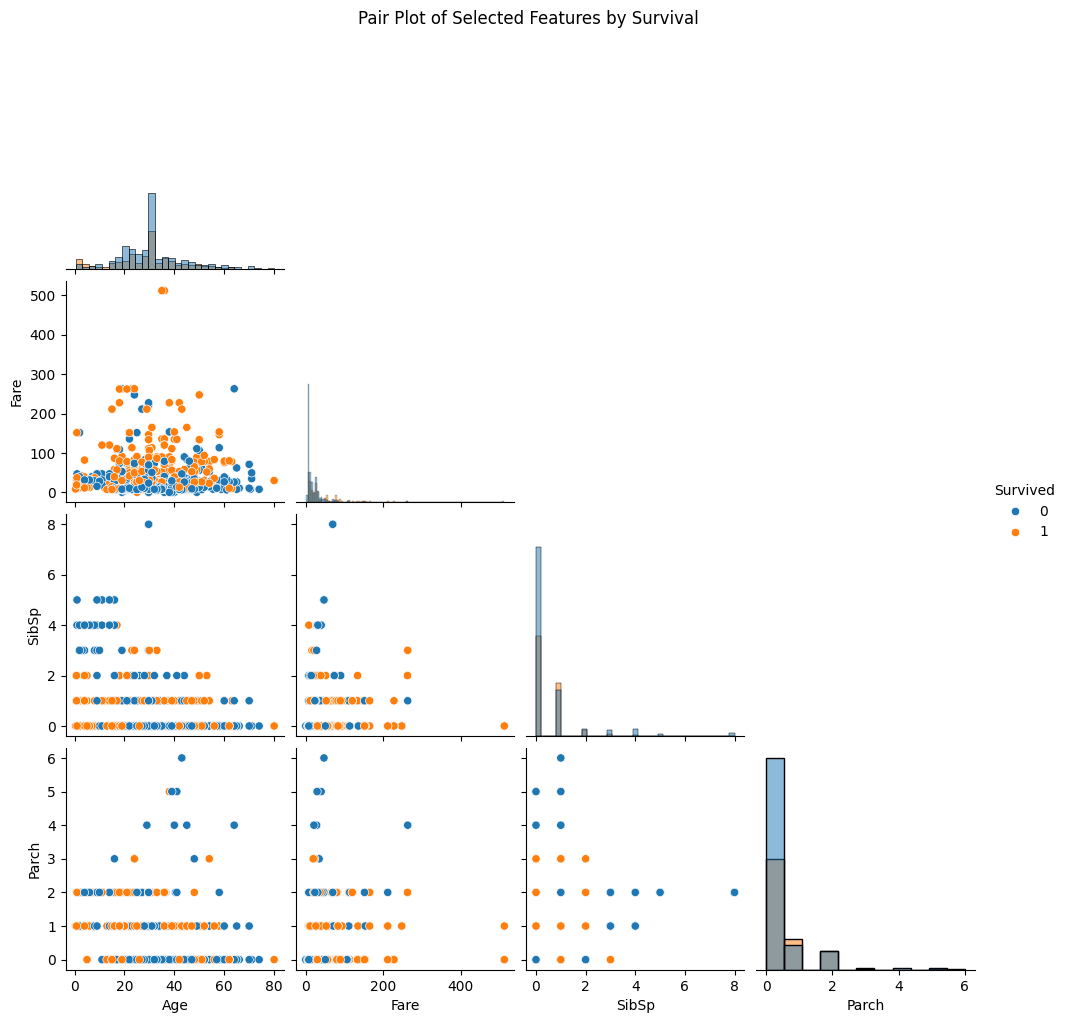

In [10]:
# Task 7: Visualizations

# TODO: Create a histogram of passenger ages
# plt.figure(figsize=(10, 6))
# Histogram of Age
plt.figure(figsize=(10, 6))
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Histogram of Passenger Ages")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# TODO: Create a bar plot of survival rates by passenger class
# Bar plot of survival rate by passenger class
plt.figure(figsize=(8, 5))
survival_by_pclass = df.groupby("Pclass")["Survived"].mean().reset_index()
sns.barplot(data=survival_by_pclass, x="Pclass", y="Survived")
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# TODO: Create a heatmap of correlation between numerical features
# plt.figure(figsize=(12, 10))
# Heatmap of correlations among numeric features
plt.figure(figsize=(12, 10))
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

# TODO: Create a pair plot of 'Age', 'Fare', 'SibSp', and 'Parch', colored by 'Survived'
# Pair plot of selected features colored by survival
pair_cols = ["Age", "Fare", "SibSp", "Parch", "Survived"]
g = sns.pairplot(df[pair_cols], hue="Survived", corner=True, diag_kind="hist")
g.fig.suptitle("Pair Plot of Selected Features by Survival", y=1.02)
plt.show()









In [11]:
# Task 8: Analyze survival rates

# TODO: Calculate and display survival rates by sex
survival_by_sex = df.groupby("Sex")["Survived"].mean().round(3)
print("\nSurvival rates by Sex:")
display(survival_by_sex)

# TODO: Calculate and display survival rates by passenger class
survival_by_class = df.groupby("Pclass")["Survived"].mean().round(3)
print("\nSurvival rates by Passenger Class:")
display(survival_by_class)


Survival rates by Sex:


,Survived
Sex,
female,0.742
male,0.189



Survival rates by Passenger Class:


,Survived
Pclass,
1,0.630
2,0.473
3,0.242


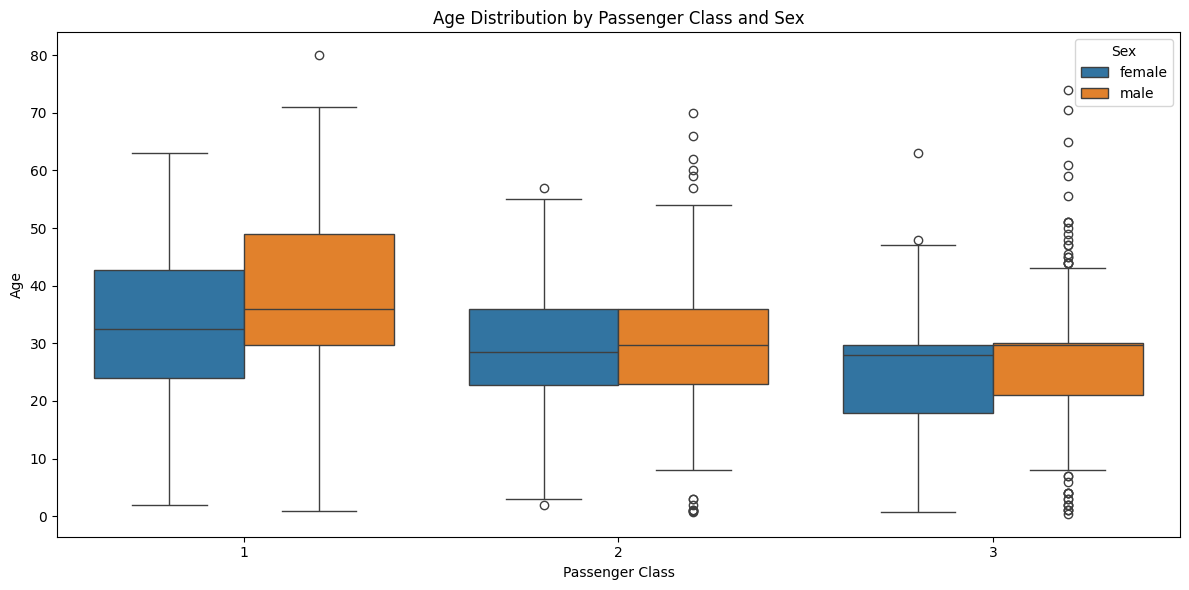

In [12]:
# Task 9: Analyze age distribution

# TODO: Create a box plot of age distribution by passenger class and sex
# plt.figure(figsize=(12, 6))
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Pclass", y="Age", hue="Sex")
plt.title("Age Distribution by Passenger Class and Sex")
plt.xlabel("Passenger Class")
plt.ylabel("Age")
plt.tight_layout()
plt.show()

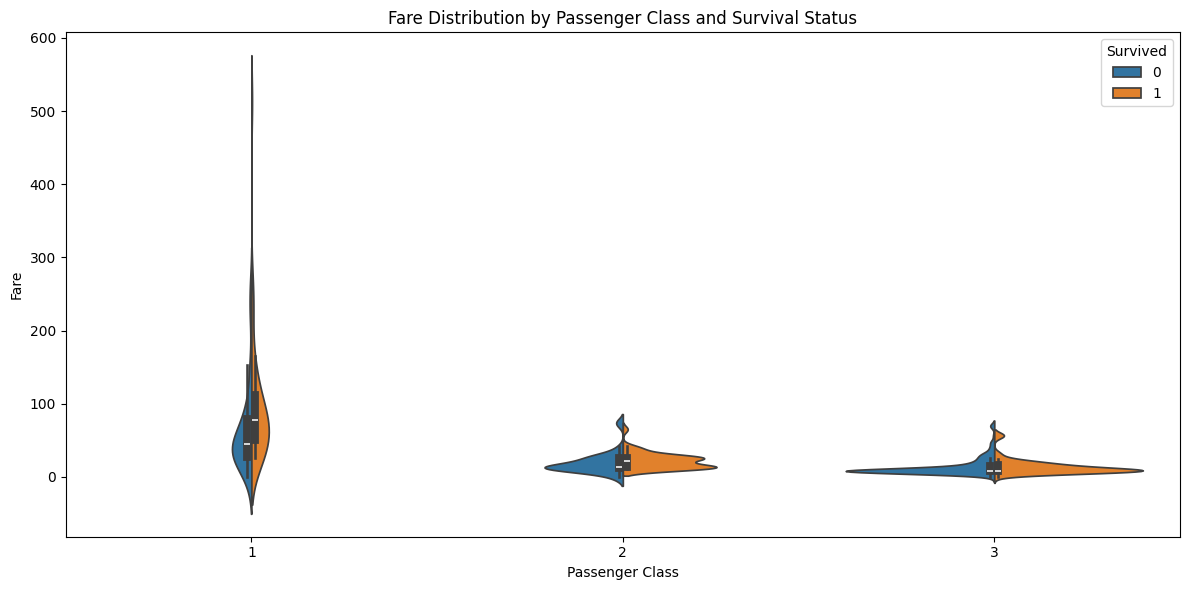


EDA tasks completed.


In [13]:
# Task 10: Analyze fare distribution

# TODO: Create a violin plot of fare distribution by passenger class and survival status
# plt.figure(figsize=(12, 6))
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x="Pclass", y="Fare", hue="Survived", split=True)
plt.title("Fare Distribution by Passenger Class and Survival Status")
plt.xlabel("Passenger Class")
plt.ylabel("Fare")
plt.tight_layout()
plt.show()

print("\nEDA tasks completed.")


## EDA Notes and Insights

- **Data loading and structure**
  - The dataset has typical Titanic fields such as Pclass, Sex, Age, SibSp, Parch, Fare, and Survived.
  - Pclass was mapped into a readable category and Cabin was converted into a simple has vs no cabin indicator for quick exploration.

- **Missing values**
  - Age had missing entries and was imputed using the global mean to avoid dropping rows during analysis and plotting.
  - After imputation, null counts dropped to near zero for the core fields used in charts.

- **Key descriptive findings**
  - The highest fare was paid by first class passengers, usually with a cabin.
  - The largest family sizes were associated with higher SibSp and Parch counts by design. Family size was defined as SibSp + Parch + 1.

- **Survival patterns**
  - Survival rate by sex shows higher survival among females compared to males.
  - Survival rate by class shows a gradient where first class had higher survival on average than third class.

- **Age and fare distributions**
  - The age histogram suggests a concentration of adults in their twenties and thirties with a tail into older ages.
  - The fare distribution is skewed to the right. The violin plot shows much higher fares in first class, as expected.

- **Correlations**
  - Fare correlates with Pclass and survival more than with SibSp or Parch.
  - Most other numeric features have modest correlations.

- **Takeaways**
  - Sex and class are strong predictors of survival in this dataset.
  - Handling missing data is important for a smooth EDA workflow with visualizations.
  - Creating simple categorical reductions, like CabinCategory, can speed up insights without deep feature engineering.
